# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
units = "metric"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | san luis
Processing Record 4 of Set 1 | toliara
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | wynyard
Processing Record 10 of Set 1 | santa cruz
Processing Record 11 of Set 1 | sabinas
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | saint-joseph
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | wakkanai
Processing Record 21 of Set 1 | pacasmayo
Processing Record 22 of Set 1 | waitangi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df["Max Temp"] = city_data_df["Max Temp"]-273.15

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,8.38,97,100,0.60,SJ,1721587139
1,grytviken,-54.2811,-36.5092,0.95,88,66,4.62,GS,1721587140
2,san luis,-33.2950,-66.3356,13.85,51,95,3.36,AR,1721586902
3,toliara,-23.3500,43.6667,20.14,79,0,4.61,MG,1721587143
4,punta arenas,-53.1500,-70.9167,7.84,75,100,12.08,CL,1721587144


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,8.38,97,100,0.60,SJ,1721587139
1,grytviken,-54.2811,-36.5092,0.95,88,66,4.62,GS,1721587140
2,san luis,-33.2950,-66.3356,13.85,51,95,3.36,AR,1721586902
3,toliara,-23.3500,43.6667,20.14,79,0,4.61,MG,1721587143
4,punta arenas,-53.1500,-70.9167,7.84,75,100,12.08,CL,1721587144


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

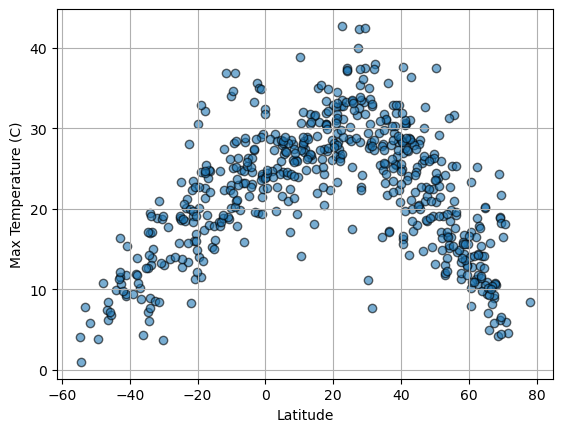

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values,y_values, alpha=0.6, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

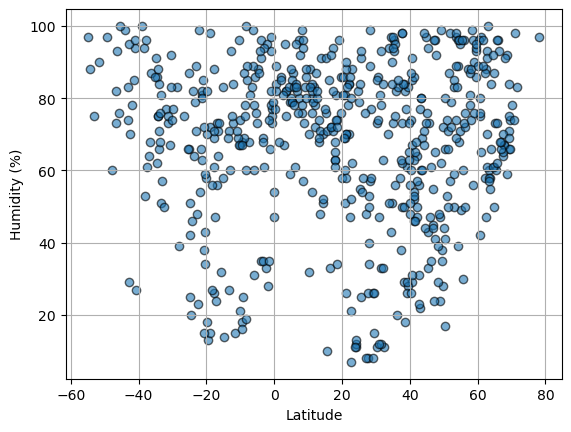

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values,y_values, alpha=0.6, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

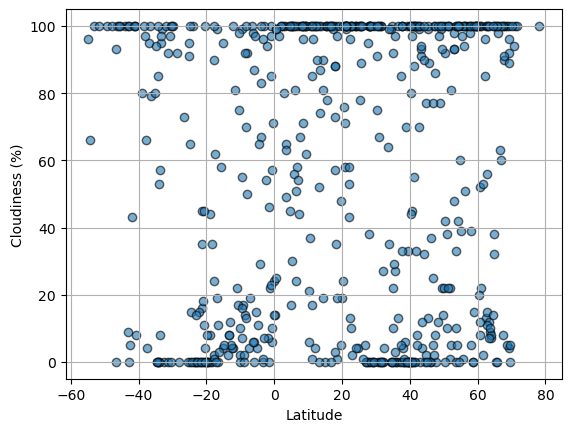

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values,y_values, alpha=0.6, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

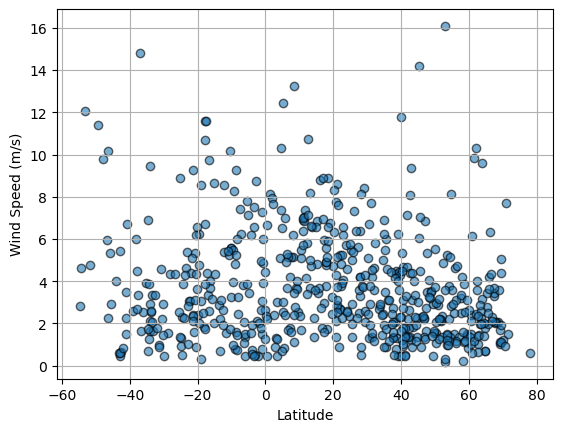

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values,y_values, alpha=0.6, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,8.38,97,100,0.60,SJ,1721587139
6,olonkinbyen,70.9221,-8.7187,5.91,98,100,7.71,SJ,1721587146
7,ribeira grande,38.5167,-28.7000,25.43,82,6,4.47,PT,1721587147
10,sabinas,27.8500,-101.1167,35.40,34,0,4.20,MX,1721587151
12,klyuchi,52.2667,79.1667,19.12,79,81,4.87,RU,1721587153


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,0.95,88,66,4.62,GS,1721587140
2,san luis,-33.2950,-66.3356,13.85,51,95,3.36,AR,1721586902
3,toliara,-23.3500,43.6667,20.14,79,0,4.61,MG,1721587143
4,punta arenas,-53.1500,-70.9167,7.84,75,100,12.08,CL,1721587144
5,adamstown,-25.0660,-130.1015,18.80,66,95,8.88,PN,1721587145


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.39163210377373714


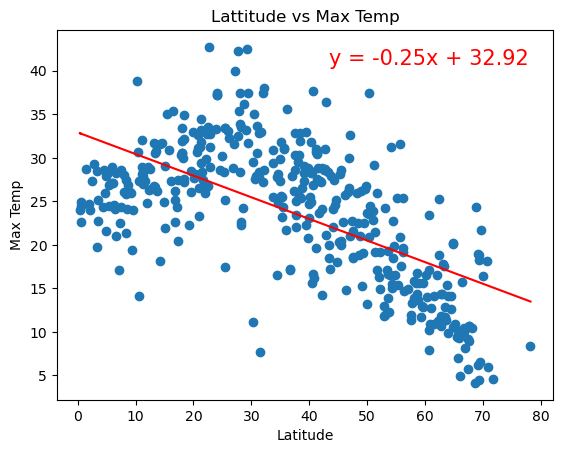

In [98]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+43, max(y_values)-2),fontsize=15,color="red")
plt.title("Lattitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6210366973769016


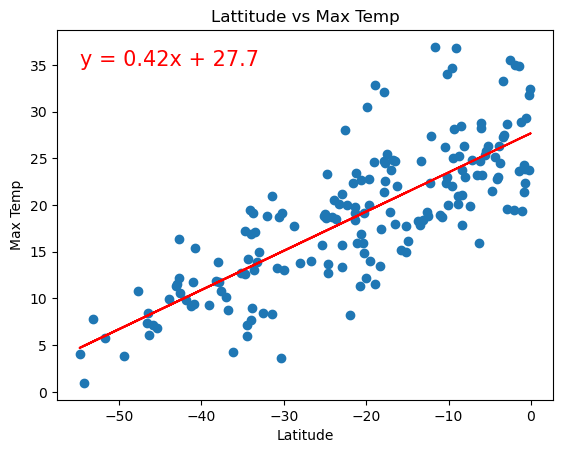

In [97]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values), max(y_values)-2),fontsize=15,color="red")
plt.title("Lattitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**<br>
Temperature vs. Latitude<br>
These plots show that the temperature rises, especially in the sourthern hemisphere, the closure you get to 0 lattitude, the equator. There is a moderate correlation for the southern hemisphere and a minor correlation for the northern.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 3.722717792718639e-05


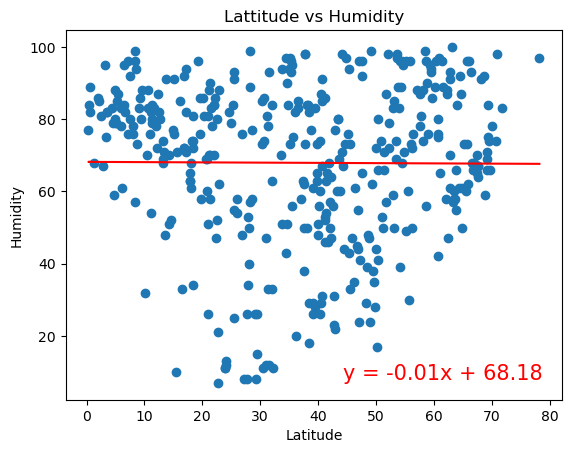

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+44, max(y_values)-92),fontsize=15,color="red")
plt.title("Lattitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03057414471101796


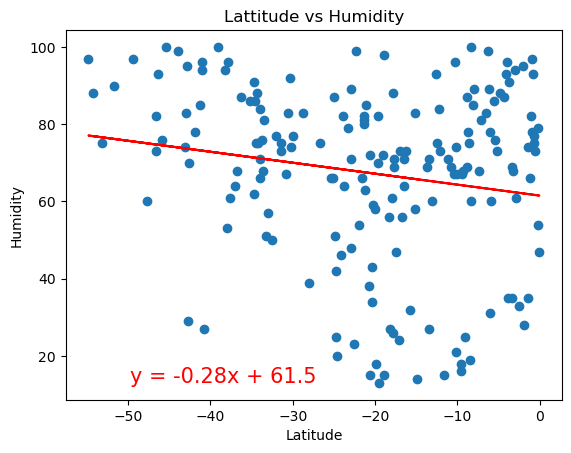

In [95]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+5, max(y_values)-87),fontsize=15,color="red")
plt.title("Lattitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**<br>
Humidity vs. Latitude<br>
The plots and the r^2 values show that there is no correlation between lattitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.010364328480375263


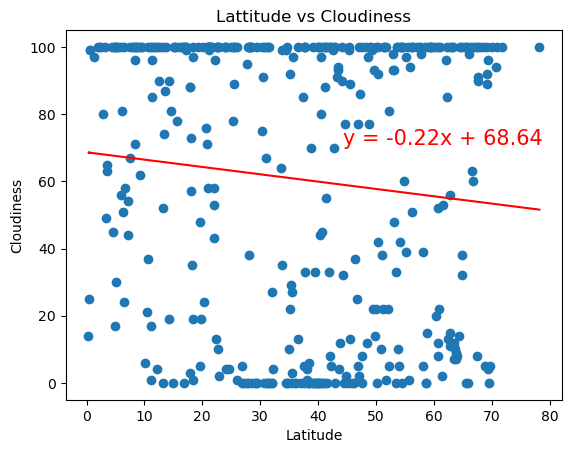

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+44, max(y_values)-29),fontsize=15,color="red")
plt.title("Lattitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06527506588945212


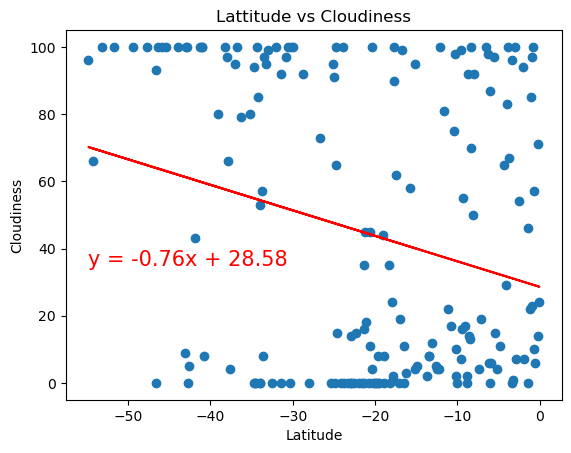

In [93]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values), max(y_values)-65),fontsize=15,color="red")
plt.title("Lattitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**<br>
Lattitude vs. Cloudiness<br>
The plots and the r^2 values show that there is no correlation between lattitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.09074956580919037


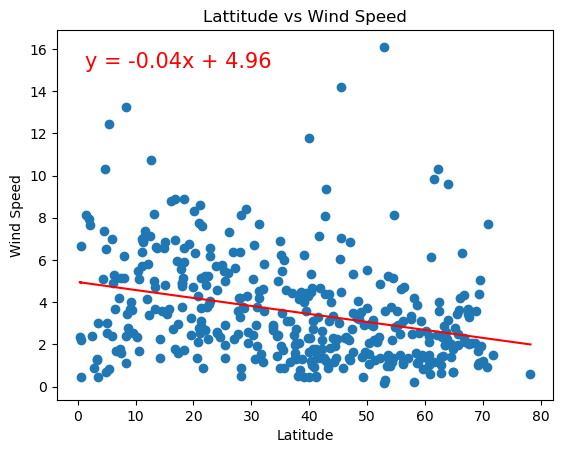

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+1, max(y_values)-1),fontsize=15,color="red")
plt.title("Lattitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.002975318344385228


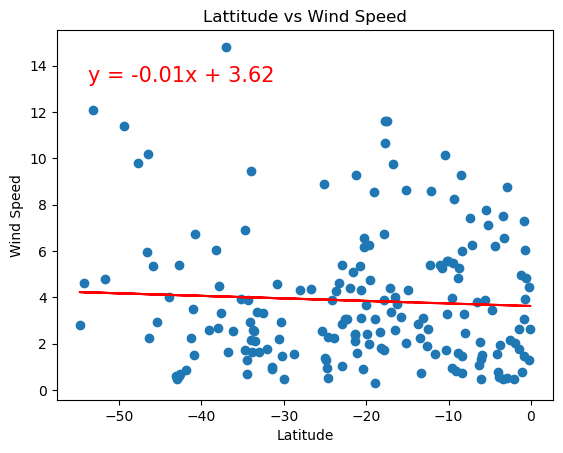

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+1, max(y_values)-1.5),fontsize=15,color="red")
plt.title("Lattitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**<br>
Lattitude vs. Wind Speed<br>
The plots and the r^2 values show that there is no correlation between lattitude and Wind Speed.